# 1. Ford Car Price Prediction Using Linear Regression 

In [39]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [40]:
df = pd.read_csv(r"C:\Users\HP\Downloads\Projects\Car price prediction\ford.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [41]:
df.shape

(17966, 9)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [43]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [44]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

<Axes: xlabel='price', ylabel='Count'>

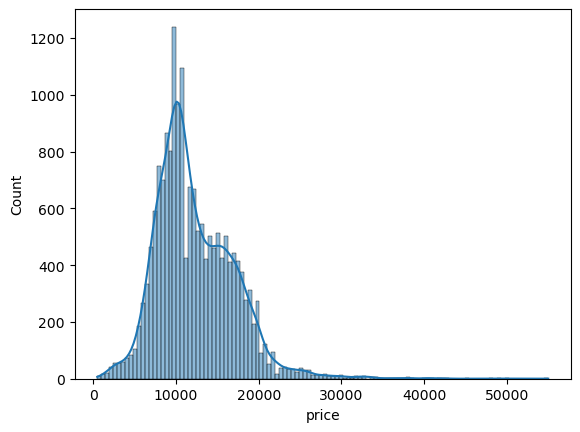

In [45]:
sns.histplot(df.price,kde=True)

<Axes: >

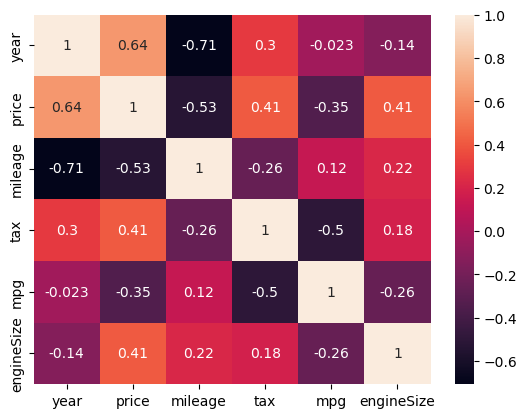

In [46]:
sns.heatmap(df.corr(numeric_only=True),annot = True)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, '1996'),
  Text(1, 0, '1998'),
  Text(2, 0, '2000'),
  Text(3, 0, '2002'),
  Text(4, 0, '2003'),
  Text(5, 0, '2004'),
  Text(6, 0, '2005'),
  Text(7, 0, '2006'),
  Text(8, 0, '2007'),
  Text(9, 0, '2008'),
  Text(10, 0, '2009'),
  Text(11, 0, '2010'),
  Text(12, 0, '2011'),
  Text(13, 0, '2012'),
  Text(14, 0, '2013'),
  Text(15, 0, '2014'),
  Text(16, 0, '2015'),
  Text(17, 0, '2016'),
  Text(18, 0, '2017'),
  Text(19, 0, '2018'),
  Text(20, 0, '2019'),
  Text(21, 0, '2020'),
  Text(22, 0, '2060')])

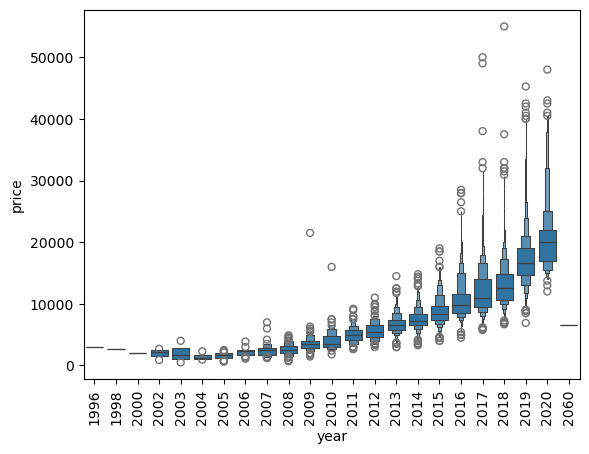

In [47]:
sns.boxenplot(data = df , x= 'year' ,y= 'price') 
plt.xticks(rotation = 90)

<Axes: xlabel='mileage', ylabel='price'>

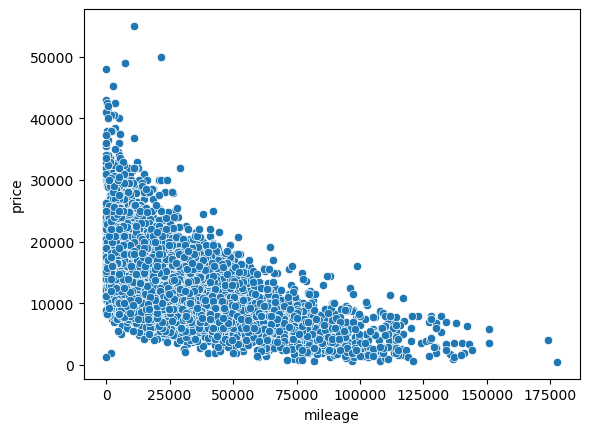

In [48]:
sns.scatterplot(data=df , x= 'mileage', y='price')

<Axes: xlabel='engineSize', ylabel='price'>

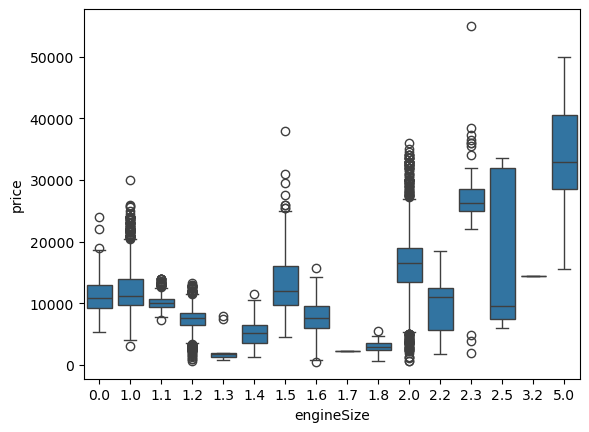

In [49]:
sns.boxplot(data=df , x='engineSize' , y='price')

In [50]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

<Axes: xlabel='transmission', ylabel='price'>

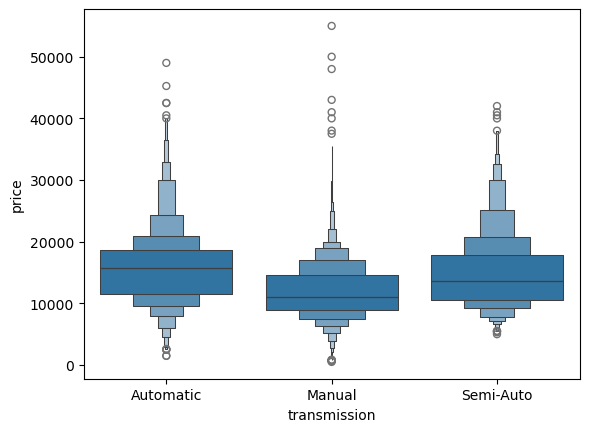

In [51]:
sns.boxenplot(data=df, x='transmission' , y='price')

<Axes: xlabel='fuelType', ylabel='price'>

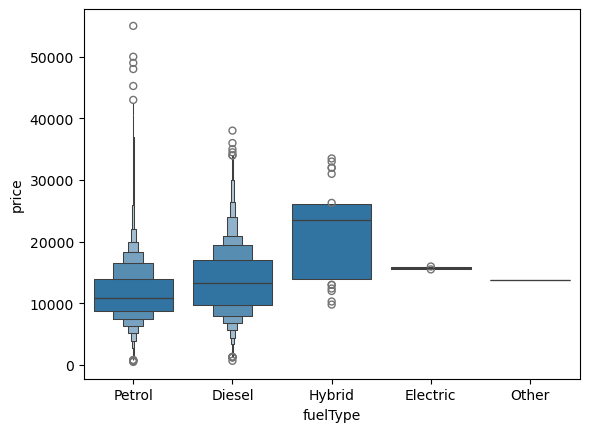

In [52]:
sns.boxenplot(data=df, x='fuelType', y='price')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ' Fiesta'),
  Text(1, 0, ' Focus'),
  Text(2, 0, ' Puma'),
  Text(3, 0, ' Kuga'),
  Text(4, 0, ' EcoSport'),
  Text(5, 0, ' C-MAX'),
  Text(6, 0, ' Mondeo'),
  Text(7, 0, ' Ka+'),
  Text(8, 0, ' Tourneo Custom'),
  Text(9, 0, ' S-MAX'),
  Text(10, 0, ' B-MAX'),
  Text(11, 0, ' Edge'),
  Text(12, 0, ' Tourneo Connect'),
  Text(13, 0, ' Grand C-MAX'),
  Text(14, 0, ' KA'),
  Text(15, 0, ' Galaxy'),
  Text(16, 0, ' Mustang'),
  Text(17, 0, ' Grand Tourneo Connect'),
  Text(18, 0, ' Fusion'),
  Text(19, 0, ' Ranger'),
  Text(20, 0, ' Streetka'),
  Text(21, 0, ' Escort'),
  Text(22, 0, ' Transit Tourneo'),
  Text(23, 0, 'Focus')])

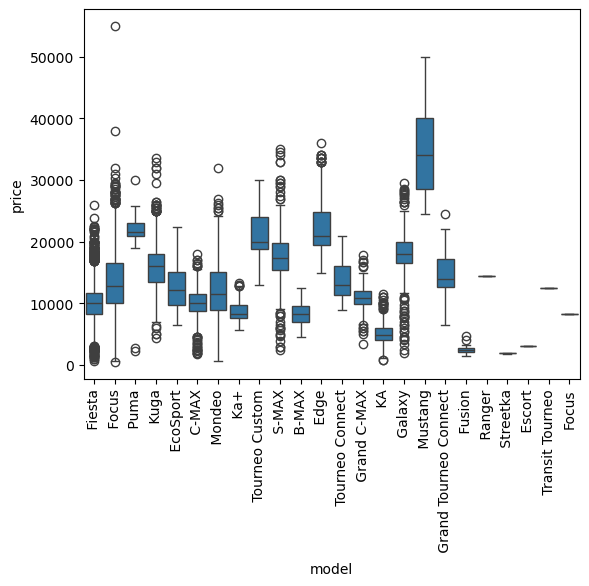

In [53]:
sns.boxplot(data=df , x='model' , y='price')
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, '0'),
  Text(1, 0, '20'),
  Text(2, 0, '22'),
  Text(3, 0, '30'),
  Text(4, 0, '110'),
  Text(5, 0, '115'),
  Text(6, 0, '120'),
  Text(7, 0, '125'),
  Text(8, 0, '135'),
  Text(9, 0, '140'),
  Text(10, 0, '145'),
  Text(11, 0, '150'),
  Text(12, 0, '155'),
  Text(13, 0, '160'),
  Text(14, 0, '165'),
  Text(15, 0, '185'),
  Text(16, 0, '190'),
  Text(17, 0, '195'),
  Text(18, 0, '200'),
  Text(19, 0, '205'),
  Text(20, 0, '210'),
  Text(21, 0, '220'),
  Text(22, 0, '230'),
  Text(23, 0, '235'),
  Text(24, 0, '240'),
  Text(25, 0, '260'),
  Text(26, 0, '265'),
  Text(27, 0, '270'),
  Text(28, 0, '290'),
  Text(29, 0, '300'),
  Text(30, 0, '305'),
  Text(31, 0, '325'),
  Text(32, 0, '330'),
  Text(33, 0, '555'),
  Text(34, 0, '570'),
  Text(35, 0, '580')])

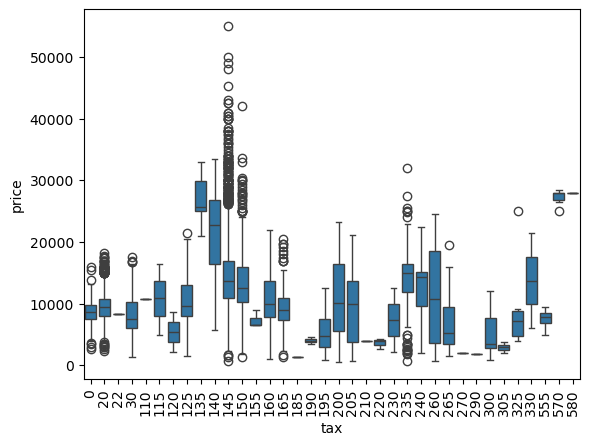

In [54]:
sns.boxplot(data=df, x='tax',y='price')
plt.xticks(rotation = 90)

In [55]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89],
 [Text(0, 0, '20.8'),
  Text(1, 0, '20.9'),
  Text(2, 0, '22.1'),
  Text(3, 0, '22.6'),
  Text(4, 0, '22.8'),
  Text(5, 0, '23.5'),
  Text(6, 0, '23.7'),
  Text(7, 0, '23.9'),
  Text(8, 0, '24.8'),
  Text(9, 0, '26.3'),
  Text(10, 0, '27.4'),
  Text(11, 0, '28.0'),
  Text(12, 0, '28.3'),
  Text(13, 0, '28.5'),
  Text(14, 0, '28.8'),
  Text(15, 0, '29.1'),
  Text(16, 0, '29.4'),
  Text(17, 0, '30.1'),
  Text(18, 0, '30.4'),
  Text(19, 0, '30.7'),
  Text(20, 0, '31.0

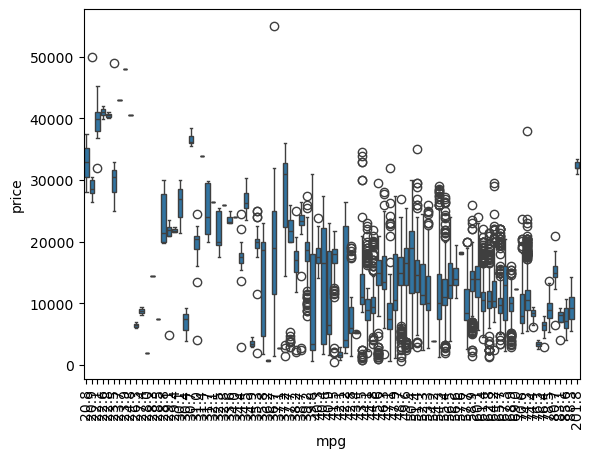

In [56]:
sns.boxplot(data=df, x='mpg', y='price')
plt.xticks(rotation = 90)

In [57]:
x = df.drop(columns=['price'], axis=1)
y = df['price']

In [58]:
x

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,Manual,5007,Petrol,145,57.7,1.2


In [59]:
x.columns

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')

In [60]:
x_one_encoded = pd.get_dummies(x,columns=['model','transmission','fuelType'], drop_first=True)

In [61]:
x_one_encoded = x_one_encoded.astype(int)

In [62]:
x_one_encoded.shape

(17966, 34)

In [63]:
x_one_encoded

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2018,9083,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,12456,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,10460,145,40,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,2019,1482,145,48,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,2014,40700,30,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,2015,7010,20,67,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17964,2018,5007,145,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [64]:
from sklearn.preprocessing import LabelEncoder

columns = ['model','transmission','fuelType']
xlable =x.copy()
label_encoders = {}

for col in columns: 
    le = LabelEncoder()
    xlable[col] = le.fit_transform(xlable[col].astype(str))
    label_encoders[col]=le

In [65]:
xlable

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,0,15944,4,150,57.7,1.0
1,6,2018,1,9083,4,150,57.7,1.0
2,6,2017,1,12456,4,150,57.7,1.0
3,5,2019,1,10460,4,145,40.3,1.5
4,5,2019,0,1482,4,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17961,0,2017,1,16700,4,150,47.1,1.4
17962,0,2014,1,40700,4,30,57.7,1.0
17963,6,2015,1,7010,0,20,67.3,1.6
17964,11,2018,1,5007,4,145,57.7,1.2


In [66]:
xlable['model'].value_counts()

model
5     6557
6     4588
13    2225
2     1143
1      543
12     531
14     526
0      355
18     296
9      247
8      228
3      208
11     199
16      80
21      69
10      59
15      57
20      33
7       16
19       2
17       1
4        1
22       1
23       1
Name: count, dtype: int64

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
numerical_cols = ['year','mileage','tax','mpg','engineSize']
scaler = StandardScaler()
x_one_encoded[numerical_cols]=scaler.fit_transform(x_one_encoded[numerical_cols])

In [70]:
xlable.columns

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')

In [71]:
xlable[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize']]=scaler.fit_transform(xlable[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize']])

In [72]:
xlable

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,-0.460699,0.065128,-2.670032,-0.380998,0.688777,0.591358,-0.020442,-0.811386
1,-0.211477,0.552866,0.041351,-0.733359,0.688777,0.591358,-0.020442,-0.811386
2,-0.211477,0.065128,0.041351,-0.560132,0.688777,0.591358,-0.020442,-0.811386
3,-0.460699,1.040605,0.041351,-0.662640,0.688777,0.510727,-1.738890,0.345070
4,-0.460699,1.040605,-2.670032,-1.123724,0.688777,0.510727,-0.909294,-0.811386
...,...,...,...,...,...,...,...,...
17961,-1.706810,0.065128,0.041351,-0.342172,0.688777,0.591358,-1.067312,0.113779
17962,-1.706810,-1.398088,0.041351,0.890398,0.688777,-1.343791,-0.020442,-0.811386
17963,-0.211477,-0.910349,0.041351,-0.839822,-1.454098,-1.505053,0.927668,0.576362
17964,1.034634,0.552866,0.041351,-0.942690,0.688777,0.510727,-0.020442,-0.348804


# Here we are going to builed two models one for on hot encoded df and another for lebel encode df 

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [74]:
X_train, X_test, y_train, y_test = train_test_split(x_one_encoded, y, test_size=0.33, random_state=42)

In [75]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [77]:
y_pred = model.predict(X_test)

In [78]:
y_pred

array([ 6888.75487917,  9328.62297666,  9420.53085767, ...,
       19099.96373064,  4948.44438264, 10424.59544226])

In [79]:
y_test

17610     6995
7076      8999
1713      7998
1611      5491
16830     3790
         ...  
6015     19000
10301    10940
15006    21999
5396      6995
6087     10299
Name: price, Length: 5929, dtype: int64

In [81]:
r2 = r2_score(y_test,y_pred)
r2

0.8396626991294073

In [83]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-((1-r2)*(n-1))/(n-p-1)
print("adjusted r2 is:",adjusted_r2)

adjusted r2 is: 0.8387377808685318


In [84]:
X_train, X_test, y_train, y_test = train_test_split(xlable, y, test_size=0.33, random_state=42)

In [85]:
model2 = LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

In [86]:
y_pred = model2.predict(X_test)

In [87]:
y_pred

array([ 6157.52473246,  9286.53653694,  9519.82817502, ...,
       19580.21385231,  7384.33202962,  9960.74790235])

In [88]:
y_test

17610     6995
7076      8999
1713      7998
1611      5491
16830     3790
         ...  
6015     19000
10301    10940
15006    21999
5396      6995
6087     10299
Name: price, Length: 5929, dtype: int64

In [89]:
r2 = r2_score(y_test,y_pred)
r2

0.731021555739114

In [90]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-((1-r2)*(n-1))/(n-p-1)
print("adjusted r2 is:",adjusted_r2)

adjusted r2 is: 0.7306580713549777
